# Tahap Preprocessing

Preprocessing dilakukan dengan beberapa tahap, diantaranya yang digunakan adalah:


1.   Menghapus URL jika ditemukan
2.   Menghapus tanda baca
3.   Menghapus Stopwords (Bahasa Inggris)
4.   Case Folding menjadi huruf kecil
5.   Tokenization
6.   Membuat Dictionary Word Index
7.   Text to sequence
8.   Padding text



## Library

In [ ]:
import pandas as pd
import numpy as np
import math as m

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Class

### DatasetProcessing

In [ ]:
from sklearn.model_selection import train_test_split

class DatasetProcessing:

    def loadDataset(self, path):
        #Load dataset dari path yang ditentukan
        dataset = pd.read_csv(path)
        return dataset

    def applyLabel(self, dataset, label):
        #Menambahkan label untuk berita yang tidak memiliki label sebelumnya
        if label == 1:
            dataset['label'] = 1
        else:
            dataset['label'] = 0

        return dataset  

    def concatDataset(self, dataset, datasetToConcat):
        #Penggabungan 2 dataframe menjadi 1 dataframe menggunakan .concat, parameter = 2 dataframe
        concatenatedDataset = pd.concat([dataset, datasetToConcat]).reset_index(drop = True)

        return concatenatedDataset

    def getNewsLength(self, dataset):
        #Mengambil panjang kata setiap teks berita pada dataframe
        sizes = []

        for text in dataset['text']:
            text = str(text)
            len_ = len(text.split())
            sizes.append(len_)

        news_length = np.array(sizes)

        return news_length
    
    def removeDuplicate(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        duplicated = dataset[dataset.duplicated(['title', 'text', 'label'])]
        duplicated_news_count = len(duplicated)
        print("Jumlah data yang terduplikasi  : ", duplicated_news_count)

        dataset = dataset.drop_duplicates(['title', 'text', 'label'], keep='first')
        updated_news_count = len(dataset)
        print("Jumlah data setelah dihapus yang terduplikasi  : ", updated_news_count)

        return dataset

    def removeNull(self, dataset):
        news_count = len(dataset)
        print("Jumlah data keseluruhan  : ", news_count)

        updated_dataset = dataset.dropna(subset=['title', 'text', 'label'])
        updated_news_count = len(updated_dataset)
        news_count = news_count - updated_news_count
        print("Jumlah data yang memiliki null values  : ", news_count)
        print("Jumlah data setelah dihapus jika memiliki null values  : ", updated_news_count)

        return updated_dataset

    def mergeNews(self, dataset):
        dataset = dataset.reset_index(drop = True)
        x = dataset['title'] + ' ' + dataset['text']
        y = dataset['label']

        return x, y

    def shuffleData(self, x, y):
        np.random.seed(42)

        x_data = np.array(x)
        y_data = y

        indices = np.arange(x_data.shape[0])
        np.random.shuffle(indices)
        x_data = x_data[indices]
        y_data = y_data[indices]

        return x_data, y_data

    def splitData(self, x, y, val, test):
        x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=val,random_state=42)
        x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=test,random_state=42)

        print("Summary data splitting: ")
        print("X_train  : ", x_train.shape)
        print("y_train  : ", y_train.shape)
        print("X_Val    : ", x_val.shape)
        print("y_train  : ", y_val.shape)
        print("X_test   : ", x_test.shape)
        print("y_test   : ", y_test.shape)

        return x_train, y_train, x_val, y_val, x_test, y_test

    def renameColumn(self, df, name, new_name):
        df = df.rename(columns={name: new_name})

        return df

### DatasetAnalysis

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

class DatasetAnalysis:

    def infoDataset(self, dataset):
        print("Dataset Information : ")
        dataset.info()

    def plotFrequency(self, dataset, len_limit=0):

        if len_limit != 0:
            dataset = dataset[dataset.len < len_limit]
        
        plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
        news_length = dataset['len']
        x = np.array(news_length)
        plt.hist(x, bins=50)
        plt.gca().set(title='Persebaran Jumlah Kata pada Berita', xlabel='Jumlah Kata', ylabel='Banyaknya Berita')

    def dataCount(self, dataset):
        count_fake = len(dataset[dataset['label'] == 1])
        count_true = len(dataset[dataset['label'] == 0])
        print("Total data pada berita Fake: ", count_fake)
        print("Total data pada berita Real: ", count_true)
        labels = ["Fake","True"]
        sizes = [count_fake, count_true]
        colors = ['lightcoral', 'lightskyblue']
        plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels, radius = 4)
        
        plt.axis('equal')
        plt.show()

### PickleManager

In [ ]:
import pickle

class PickleManager:
    def pickleSave(self, path, variable):
        new_path = path
        with open(new_path, 'wb') as f:
            pickle.dump(variable, f)
        f.close()
        print("Saved to path : ", new_path)

    def pickleLoad(self, path):
        new_path = path
        load_file = open(new_path, 'rb')
        loaded_file = pickle.load(load_file)

        return loaded_file

### TextCleaning

In [ ]:
# Preprocessing
class TextCleaning():

    def removeUrl(self, text):
        #Penjelasan: Buang teks yang memiliki URL
        text_result = text.split(" ")
        text_result = ' '.join(
            [i 
            for i in text_result
              if 'http://' not in i
            ])
        return text_result

    def removeLineBreak(self, text):
        #Penjelasan: menghapus pemisah kalimat '\n' atau newline
        line_break = '\n'
        text_result = ""
        for character in text:
          if character not in line_break:
            text_result = text_result + character

        
        return text_result

    def removePunctuation(self, text):
        #Penjelasan: Buang teks yang memiliki tanda baca
        punctuations = ['','!','(',')','-','[',']','{','}',';',':',"'",'"','`','/','<'
        ,'>','.','?','@','#','$','%','&','*','_','~','’','”','“', ',', '']

        text_result = ""
        for character in text:
          if character not in punctuations:
            text_result = text_result + character

        return text_result

    def textLower(self, text):
        #Penjelasan: mengubah huruf teks menjadi huruf kecil semua
        text_result = text.lower()
        return text_result

    def removeStopwords(self, text):
        #Penjelasan: Membuang kata-kata yang tidak memiliki makna dari sebuah kalimat     
        stopwords_list = ['i','me','my','myself','we','our','ours','ourselves','you',
                          "you're","you've","you'll","you'd",'your','yours','yourself'
                          ,'yourselves','he','him','his','himself','she',"she's",'her'
                          ,'hers','herself','it',"it's",'its','itself','they','them',
                          'their','theirs','themselves','what','which','who','whom',
                          'this','that',"that'll",'these','those','am','is','are',
                          'was','were','be','been','being','have','has','had',
                          'having','do','does','did','doing','a','an','the','and',
                          'but','if','or','because','as','until','while','of','at',
                          'by','for','with','about','against','between','into',
                          'through','during','before','after','above','below','to',
                          'from','up','down','in','out','on','off','over','under',
                          'again','further','then','once','here','there','when',
                          'where','why','how','all','any','both','each','few','more',
                          'most','other','some','such','no','nor','not','only','own',
                          'same','so','than','too','very','s','t','can','will','just',
                          'don',"don't",'should',"should've",'now','d','ll','m','o',
                          're','ve','y','ain','aren',"aren't",'couldn',"couldn't",
                          'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',
                          "hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
                          "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',
                          "shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
                          "weren't",'won',"won't",'wouldn',"wouldn't"]

        text_result = ""
        text = text.split()

        for word in text:
          if word not in stopwords_list:
            text_result = text_result + " " + word
        
            
        return text_result
        
    def doClean(self, text):
        result = self.removeUrl(text)
        result = self.removeLineBreak(result)
        result = self.removePunctuation(result)
        result = self.textLower(result)
        result = self.removeStopwords(result)

        return str(result.strip()).replace(" ", " ")

    def main(self, x):
        cleaned_text = []
        for line in x: 

            cleaned_text.append(self.doClean(str(line)))
        
        return cleaned_text

    def newsLimiter(self, text, y, limit):
        updated_cleaned_text = []
        updated_y = []

        for i in range(len(text)):
            news_length = len(text[i].split())
            if news_length > limit:
                updated_cleaned_text.append(text[i])
                updated_y.append(y[i])

        return updated_cleaned_text, updated_y

### TextPreprocessing

In [ ]:
class TextPreprocessing:
    def __init__(self, word_index={}):
        self.word_index = word_index

    def doTokenize(self, text):
        word_token = []

        for i in text:
            temp = i.split(" ")
            word_token = word_token + temp

        return word_token

    def findUniqueWord(self, list_word):

        def takeSecond(elem):
            return elem[1]

        unique_word = {}
        for word in list_word:
            if word in unique_word:
                unique_word[word] +=1
            else:
                unique_word[word] = 1

        data = list(unique_word.items())
        data.sort(key=takeSecond, reverse=True)
        word_counted = np.array(data)
        

        return word_counted

    def wordIndexing(self, word):
        index=1
        word_index = {}

        for i in range(len(word)):
            word_index[word[i][0]] = index
            index = index + 1

        return word_index

    def textToSequences(self, text):
        sequenced_text = []
        for i in range(len(text)):
            temp = text[i].split()
            indexed_sentences = []
            for word in temp:
                if word in self.word_index:
                    indexed_sentences.append(self.word_index[word])
            sequenced_text.append(indexed_sentences)

        return sequenced_text

    def doPrePadded(self, sequenced_text, maxlen=300):
        padded_sequences = []
        for news in sequenced_text:
            news_to_check = news
            news_length = len(news)
            if news_length < maxlen:
                zeros = [0]*(maxlen-news_length)
                padded_news = zeros + news
            else:
                padded_news = news[:maxlen]
            padded_sequences.append(padded_news)

        return padded_sequences

    def main(self, text):
        #Kata yang tertoken tapi tidak unik
        word_token = self.doTokenize(text)

        #Token yang unik dengan jumlah
        word_counted = self.findUniqueWord(word_token)    

        #Token dijadikan index dictionary
        self.word_index = self.wordIndexing(word_counted)

        #Text berita diubah ke sequence based by word index
        sequenced_text = self.textToSequences(text)

        result_padded = self.doPrePadded(sequenced_text)

        return self.word_index, sequenced_text, word_counted, result_padded


### Embedding

In [ ]:
class Embedding:
    def __init__(self, word_index):
        self.embedding_matrix = []
        self.word_index = word_index

    def getGlove(self, dim):
        EMBEDDING_DIM = dim
        GLOVE_DIR = 'drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'

        embeddings_index = {}
        f = open(GLOVE_DIR, encoding='utf8')
        print('Loading Glove from:', GLOVE_DIR,'…', end='')
        for line in f:
            values = line.split()
            word = values[0]
            embeddings_index[word] = np.asarray(values[1:], dtype='float32')
        f.close()
        print('Done.\n Proceeding with Embedding Matrix…', end='')
                                                
        self.embedding_matrix = np.zeros((len(self.word_index) + 1, EMBEDDING_DIM))
        missing_embedding = 0
                                                
        for word, i in self.word_index.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                self.embedding_matrix[i] = embedding_vector
            else:
                missing_embedding += 1

        print("Missing Embedding from Glove: ", missing_embedding)
        return self.embedding_matrix

## Import Dataset

In [ ]:
df_dataset_kaggle = "drive/MyDrive/Tugas Akhir/Program/Dataset/data.csv"
df_dataset_isotfake = "drive/MyDrive/Tugas Akhir/Program/Dataset/Fake.csv"
df_dataset_isottrue = "drive/MyDrive/Tugas Akhir/Program/Dataset/True.csv"

## DatasetProcessing

In [ ]:
process_dataset = DatasetProcessing()

##### Process Dataset ISOT

In [ ]:
df_fake = process_dataset.loadDataset(df_dataset_isotfake)
df_fake = process_dataset.applyLabel(df_fake, 1)
df_fake['len'] = process_dataset.getNewsLength(df_fake)

df_true = process_dataset.loadDataset(df_dataset_isottrue)
df_true = process_dataset.applyLabel(df_true, 0)
df_true['len'] = process_dataset.getNewsLength(df_true)

In [ ]:
df_dataset_1 = process_dataset.concatDataset(df_fake, df_true)

In [ ]:
df_dataset_1 = df_dataset_1[["title", "text", "label", "len"]]

In [ ]:
df_dataset_1

title  ...  len
0       Donald Trump Sends Out Embarrassing New Year’...  ...  495
1       Drunk Bragging Trump Staffer Started Russian ...  ...  305
2       Sheriff David Clarke Becomes An Internet Joke...  ...  580
3       Trump Is So Obsessed He Even Has Obama’s Name...  ...  444
4       Pope Francis Just Called Out Donald Trump Dur...  ...  420
...                                                  ...  ...  ...
44893  'Fully committed' NATO backs new U.S. approach...  ...  466
44894  LexisNexis withdrew two products from Chinese ...  ...  125
44895  Minsk cultural hub becomes haven from authorities  ...  320
44896  Vatican upbeat on possibility of Pope Francis ...  ...  205
44897  Indonesia to buy $1.14 billion worth of Russia...  ...  210

[44898 rows x 4 columns]

##### Process Dataset Kaggle

In [ ]:
df_2 = process_dataset.loadDataset(df_dataset_kaggle)

In [ ]:
df_2 = process_dataset.renameColumn(df_2, 'Headline', 'title')
df_2 = process_dataset.renameColumn(df_2, 'Body', 'text')
df_2 = process_dataset.renameColumn(df_2, 'Label', 'label')

In [ ]:
df_dataset_2 = df_2

In [ ]:
df_dataset_2['len'] = process_dataset.getNewsLength(df_dataset_2)

In [ ]:
df_dataset_2 = df_dataset_2[["title", "text", "label", "len"]]

In [ ]:
df_dataset_2

title  ...   len
0            Four ways Bob Corker skewered Donald Trump  ...  1061
1     Linklater's war veteran comedy speaks to moder...  ...   551
2     Trump’s Fight With Corker Jeopardizes His Legi...  ...  1086
3     Egypt's Cheiron wins tie-up with Pemex for Mex...  ...    97
4           Jason Aldean opens 'SNL' with Vegas tribute  ...    37
...                                                 ...  ...   ...
4004                                    Trends to Watch  ...   326
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...  ...    57
4006        Ron Paul on Trump, Anarchism & the AltRight  ...     1
4007  China to accept overseas trial data in bid to ...  ...   316
4008  Vice President Mike Pence Leaves NFL Game Beca...  ...   588

[4009 rows x 4 columns]

In [ ]:
#MERGE 2 DATASET 
merged_dataset = process_dataset.concatDataset(df_dataset_1, df_dataset_2)

In [ ]:
df_dataset = merged_dataset

## Analisa Dataset

In [ ]:
analyze_dataset = DatasetAnalysis()

### Informasi Dataset

In [ ]:
analyze_dataset.infoDataset(df_dataset)

Dataset Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   48907 non-null  object
 1   text    48886 non-null  object
 2   label   48907 non-null  int64 
 3   len     48907 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


### Preview Dataset

In [ ]:
df_dataset.head()

title  ...  len
0   Donald Trump Sends Out Embarrassing New Year’...  ...  495
1   Drunk Bragging Trump Staffer Started Russian ...  ...  305
2   Sheriff David Clarke Becomes An Internet Joke...  ...  580
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  444
4   Pope Francis Just Called Out Donald Trump Dur...  ...  420

[5 rows x 4 columns]

In [ ]:
df_dataset.tail()

title  ...  len
48902                                    Trends to Watch  ...  326
48903  Trump Jr. Is Soon To Give A 30-Minute Speech F...  ...   57
48904        Ron Paul on Trump, Anarchism & the AltRight  ...    1
48905  China to accept overseas trial data in bid to ...  ...  316
48906  Vice President Mike Pence Leaves NFL Game Beca...  ...  588

[5 rows x 4 columns]

In [ ]:
df_dataset

title  ...  len
0       Donald Trump Sends Out Embarrassing New Year’...  ...  495
1       Drunk Bragging Trump Staffer Started Russian ...  ...  305
2       Sheriff David Clarke Becomes An Internet Joke...  ...  580
3       Trump Is So Obsessed He Even Has Obama’s Name...  ...  444
4       Pope Francis Just Called Out Donald Trump Dur...  ...  420
...                                                  ...  ...  ...
48902                                    Trends to Watch  ...  326
48903  Trump Jr. Is Soon To Give A 30-Minute Speech F...  ...   57
48904        Ron Paul on Trump, Anarchism & the AltRight  ...    1
48905  China to accept overseas trial data in bid to ...  ...  316
48906  Vice President Mike Pence Leaves NFL Game Beca...  ...  588

[48907 rows x 4 columns]

### Persebaran Dataset

In [ ]:
news_to_analyze = df_dataset

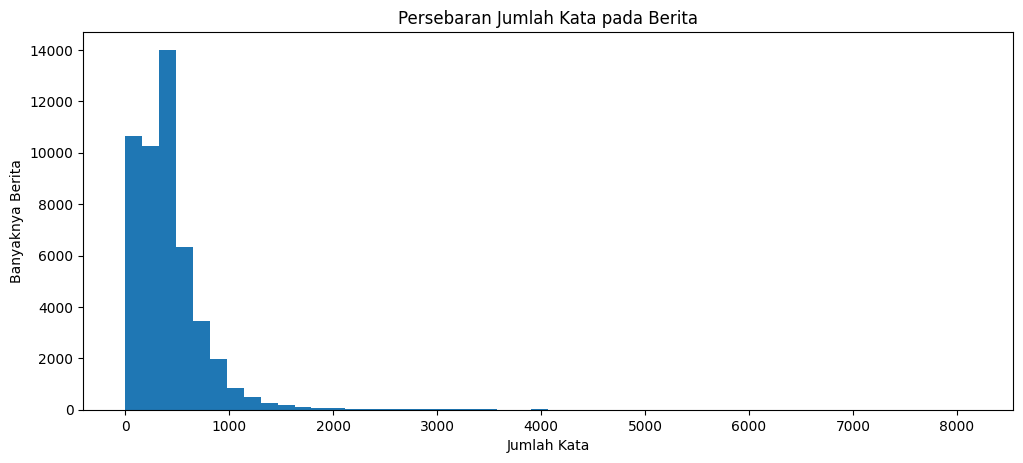

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze)

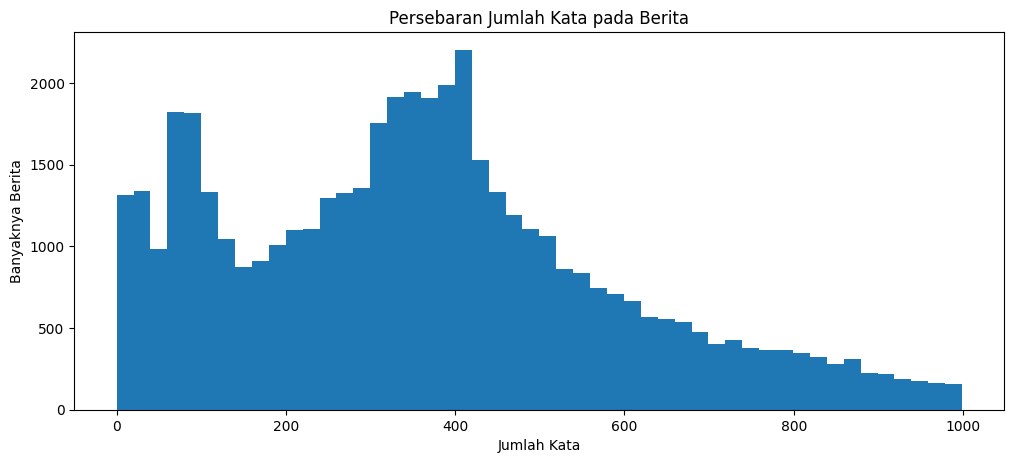

In [ ]:
analyze_dataset.plotFrequency(news_to_analyze, 1000)

In [ ]:
news_to_process = news_to_analyze

#### Hapus data yang duplikat

In [ ]:
#Hapus data yang duplikat
print("Jumlah data keseluruhan: ", len(news_to_process))

Jumlah data keseluruhan:  48907


In [ ]:
dataset_temp = process_dataset.removeDuplicate(news_to_process)

Jumlah data keseluruhan  :  48907
Jumlah data yang terduplikasi  :  6259
Jumlah data setelah dihapus yang terduplikasi  :  42648


In [ ]:
dataset_temp = process_dataset.removeNull(dataset_temp)

Jumlah data keseluruhan  :  42648
Jumlah data yang memiliki null values  :  21
Jumlah data setelah dihapus jika memiliki null values  :  42627


#### Persebaran Data

Total data pada berita Fake:  19627
Total data pada berita Real:  23000


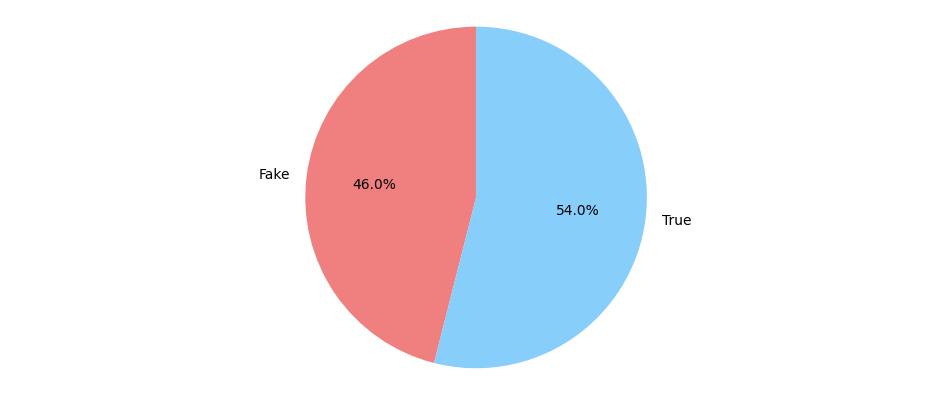

In [ ]:
analyze_dataset.dataCount(dataset_temp)

### Contoh untuk Teks Uji

In [ ]:
x_uji, y_uji = process_dataset.mergeNews(dataset_temp)

In [ ]:
y_uji = np.array(y_uji)
new_x, new_y = process_dataset.shuffleData(x_uji, y_uji)
x_train_uji, y_train_uji, x_val_uji, y_val_uj, x_test_uji, y_test_uji = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (25575,)
y_train  :  (25575,)
X_Val    :  (8526,)
y_train  :  (8526,)
X_test   :  (8526,)
y_test   :  (8526,)


In [ ]:
x_test_uji[0]

"Obama, Italy's Mattarella discuss fight against Islamic State in Libya WASHINGTON (Reuters) - U.S. President Barack Obama and Italian President Sergio Mattarella met on Monday in the White House and discussed efforts to work together to combat the Islamic State in Libya. During a meeting in the Oval Office, Obama and Mattarella talked about the need to help Libya form a united government. “That will allow us to help them build up their security capacity and to push back against efforts by ISIL to gain a foothold in that country,” Obama told reporters after the meeting, using an acronym for Islamic State.  Islamic State forces have attacked Libya’s oil infrastructure and taken control of the city of Sirte, exploiting a power vacuum in the North African country where two rival governments have been battling for supremacy. Obama and Mattarella also discussed the refugee crisis facing Europe and the situation in Iraq and Syria. "

In [ ]:
y_test_uji[0]

0

### Menggabungkan Title dan Text berita
Referensi: https://www.sciencedirect.com/science/article/pii/S1877050920300806

In [ ]:
x, y = process_dataset.mergeNews(dataset_temp)

## Preprocessing

### Text Cleaning

In [ ]:
text_cleaning = TextCleaning()

In [ ]:
cleaned_text = text_cleaning.main(x)

#### Preview

##### Before

In [ ]:
x[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

##### After

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

Text Limiter untuk Pengujian panjang berita

In [ ]:
cleaned_text_25, y_25 = text_cleaning.newsLimiter(cleaned_text, y, 25)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_25), "Jumlah label: ", len(y_25))

Jumlah berita:  41101 Jumlah label:  41101


In [ ]:
cleaned_text_50, y_50 = text_cleaning.newsLimiter(cleaned_text, y, 50)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_50), "Jumlah label: ", len(y_50))

Jumlah berita:  38966 Jumlah label:  38966


In [ ]:
cleaned_text_100, y_100 = text_cleaning.newsLimiter(cleaned_text, y, 100)

In [ ]:
print("Jumlah berita: ", len(cleaned_text_100), "Jumlah label: ", len(y_100))

Jumlah berita:  33619 Jumlah label:  33619


### Data Shuffling and Splitting

Panjang Berita limit = 0

In [ ]:
y = np.array(y)
new_x, new_y = process_dataset.shuffleData(cleaned_text, y)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x, new_y, 0.2, 0.25)

Summary data splitting: 
X_train  :  (25575,)
y_train  :  (25575,)
X_Val    :  (8526,)
y_train  :  (8526,)
X_test   :  (8526,)
y_test   :  (8526,)


In [ ]:
x_test[0]

'obama italys mattarella discuss fight islamic state libya washington reuters us president barack obama italian president sergio mattarella met monday white house discussed efforts work together combat islamic state libya meeting oval office obama mattarella talked need help libya form united government allow us help build security capacity push back efforts isil gain foothold country obama told reporters meeting using acronym islamic state islamic state forces attacked libyas oil infrastructure taken control city sirte exploiting power vacuum north african country two rival governments battling supremacy obama mattarella also discussed refugee crisis facing europe situation iraq syria'

Panjang Berita limit = 25

In [ ]:
y_25 = np.array(y_25)
new_x_25, new_y_25 = process_dataset.shuffleData(cleaned_text_25, y_25)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_25, new_y_25, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1791,)
y_train  :  (1791,)
X_Val    :  (598,)
y_train  :  (598,)
X_test   :  (598,)
y_test   :  (598,)


Panjang Berita limit = 50

In [ ]:
y_50 = np.array(y_50)
new_x_50, new_y_50 = process_dataset.shuffleData(cleaned_text_50, y_50)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_50, new_y_50, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1560,)
y_train  :  (1560,)
X_Val    :  (521,)
y_train  :  (521,)
X_test   :  (520,)
y_test   :  (520,)


Panjang Berita limit = 100

In [ ]:
y_100 = np.array(y_100)
new_x_100, new_y_100 = process_dataset.shuffleData(cleaned_text_100, y_100)
x_train, y_train, x_val, y_val, x_test, y_test = process_dataset.splitData(new_x_100, new_y_100, 0.2, 0.25)

Summary data splitting: 
X_train  :  (1449,)
y_train  :  (1449,)
X_Val    :  (483,)
y_train  :  (483,)
X_test   :  (483,)
y_test   :  (483,)


## Length 0

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[3331,
 2,
 2028,
 410,
 602,
 349,
 41127,
 2816,
 22,
 11,
 451,
 453,
 33881,
 14201,
 16252,
 12,
 11371,
 3165,
 5661,
 603,
 27698,
 31,
 3,
 15,
 639,
 20645,
 2816,
 336,
 199,
 105,
 116,
 181,
 8010,
 8721,
 272,
 22,
 1170,
 2198,
 59,
 9666,
 602,
 3299,
 1192,
 469,
 18,
 13,
 15,
 967,
 548,
 87,
 881,
 436,
 71,
 4,
 10070,
 410,
 602,
 1080,
 740,
 1164,
 25,
 156,
 216,
 1429,
 11371,
 2582,
 18,
 13,
 1875,
 51,
 2398,
 18379,
 804,
 603,
 31,
 15,
 476,
 162,
 2816,
 140,
 59,
 44,
 7890,
 1263,
 114,
 2105,
 2923,
 27,
 5,
 14,
 2,
 2,
 71,
 1430,
 7279,
 736,
 865,
 410,
 602,
 23,
 14201,
 349,
 16639,
 2816,
 80,
 15,
 566,
 44,
 754,
 3500,
 11,
 2211,
 248,
 1181,
 2,
 5148,
 291,
 606,
 5377,
 13983,
 2616,
 410,
 602,
 1397,
 2816,
 71,
 12397,
 395,
 7279,
 248,
 736,
 2243,
 7,
 28,
 4066,
 4432,
 1898,
 1247,
 2,
 184,
 8798,
 2140,
 194,
 2304,
 478,
 410,
 602,
 582,
 991,
 2816,
 736,
 7769,
 22,
 71,
 93,
 2346,
 2228,
 1080,
 740,
 733,
 248,
 2426,
 

In [ ]:
padded_sequences[0]

[3331,
 2,
 2028,
 410,
 602,
 349,
 41127,
 2816,
 22,
 11,
 451,
 453,
 33881,
 14201,
 16252,
 12,
 11371,
 3165,
 5661,
 603,
 27698,
 31,
 3,
 15,
 639,
 20645,
 2816,
 336,
 199,
 105,
 116,
 181,
 8010,
 8721,
 272,
 22,
 1170,
 2198,
 59,
 9666,
 602,
 3299,
 1192,
 469,
 18,
 13,
 15,
 967,
 548,
 87,
 881,
 436,
 71,
 4,
 10070,
 410,
 602,
 1080,
 740,
 1164,
 25,
 156,
 216,
 1429,
 11371,
 2582,
 18,
 13,
 1875,
 51,
 2398,
 18379,
 804,
 603,
 31,
 15,
 476,
 162,
 2816,
 140,
 59,
 44,
 7890,
 1263,
 114,
 2105,
 2923,
 27,
 5,
 14,
 2,
 2,
 71,
 1430,
 7279,
 736,
 865,
 410,
 602,
 23,
 14201,
 349,
 16639,
 2816,
 80,
 15,
 566,
 44,
 754,
 3500,
 11,
 2211,
 248,
 1181,
 2,
 5148,
 291,
 606,
 5377,
 13983,
 2616,
 410,
 602,
 1397,
 2816,
 71,
 12397,
 395,
 7279,
 248,
 736,
 2243,
 7,
 28,
 4066,
 4432,
 1898,
 1247,
 2,
 184,
 8798,
 2140,
 194,
 2304,
 478,
 410,
 602,
 582,
 991,
 2816,
 736,
 7769,
 22,
 71,
 93,
 2346,
 2228,
 1080,
 740,
 733,
 248,
 2426,
 

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 199270


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'state': 9,
 'also': 10,
 'reuters': 11,
 'house': 12,
 'states': 13,
 'donald': 14,
 'government': 15,
 'republican': 16,
 'could': 17,
 'united': 18,
 'clinton': 19,
 'told': 20,
 'white': 21,
 'obama': 22,
 'like': 23,
 'two': 24,
 'last': 25,
 'campaign': 26,
 'time': 27,
 'first': 28,
 'election': 29,
 'party': 30,
 'news': 31,
 'former': 32,
 'year': 33,
 'washington': 34,
 'even': 35,
 'years': 36,
 'country': 37,
 'may': 38,
 'many': 39,
 'security': 40,
 'national': 41,
 'say': 42,
 'trumps': 43,
 'court': 44,
 'get': 45,
 'make': 46,
 'video': 47,
 'made': 48,
 'law': 49,
 'percent': 50,
 'since': 51,
 'republicans': 52,
 'political': 53,
 'north': 54,
 'going': 55,
 'police': 56,
 'media': 57,
 'hillary': 58,
 'back': 59,
 'senate': 60,
 'presidential': 61,
 'week': 62,
 'says': 63,
 'bill': 64,
 'american': 65,
 'russia': 66,
 'support': 67,
 'democratic': 68,
 'including':

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  126700


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 25

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[7125,
 1535,
 5854,
 14018,
 2147,
 6484,
 99,
 8729,
 833,
 4238,
 11,
 1126,
 5,
 3916,
 1535,
 20666,
 2731,
 14018,
 80,
 2147,
 103,
 18,
 1259,
 4515,
 79,
 99,
 6241,
 1334,
 14018,
 271,
 14519,
 3968,
 121,
 12269,
 76,
 127,
 7,
 1535,
 723,
 3190,
 688,
 1537,
 372,
 6484,
 79,
 99,
 5294,
 4958,
 3083,
 20018,
 971,
 57585,
 1,
 14018,
 915,
 515,
 47657,
 41224,
 5818,
 174,
 57586,
 12269,
 29463,
 688,
 9,
 1,
 1126,
 271,
 11110,
 959,
 12269,
 154,
 4238,
 1535,
 13380,
 371,
 1259,
 545,
 628,
 688,
 2970,
 821,
 448,
 6813,
 950,
 19409,
 502,
 12269,
 105,
 399,
 783,
 105,
 14018,
 1484,
 7508,
 4750,
 2807,
 141,
 76,
 127,
 7,
 211,
 317,
 6889,
 1535,
 1,
 79347,
 41224,
 3595,
 12269,
 6,
 31453,
 626,
 121,
 12595,
 27,
 127,
 12796,
 6,
 41225,
 341,
 14520,
 14258,
 41,
 1535,
 13380,
 5818,
 5819,
 3336,
 742,
 4238,
 626,
 6,
 222,
 9198,
 1,
 18,
 1259,
 4515,
 367,
 3,
 1245,
 1985,
 1535,
 31454,
 465,
 30,
 1332,
 1605,
 271,
 6484,
 3756,
 328,
 1259

In [ ]:
padded_sequences[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7125,
 1535,
 5854,
 14018,
 2147,
 6484,
 99,
 8729,
 833,
 4238,
 11,
 1126,
 5,
 3916,
 1535,
 20666,
 2731,
 14018,
 80,
 2147,
 103,
 18,
 1259,
 4515,
 79,
 99,
 6241,
 1334,
 14018,
 271,
 14519,
 3968,
 121,
 12269,
 76,
 127,
 7,
 1535,
 723,
 3190,
 688,
 1537,
 372,
 6484,
 79,
 99,
 5294,
 4958,
 3083,
 20018,
 971,
 57585,
 1,
 14018,
 915,
 515,
 47657,
 41224,
 5818,
 174,
 57586,
 12269,
 29463,
 688,
 9,
 1,
 1126,
 271,
 11110,
 959,
 12269,
 154,
 4238,
 1535,
 13380,
 371,
 1259,
 545,
 628,
 688,
 2970,
 821,
 448,
 6813,
 950,
 19409,
 502,
 12269,
 105,
 399,
 783,
 105,
 14018,
 1484,
 7508,
 4750,
 2807,
 141,
 76,
 127,
 7,
 211,
 317,
 6889,
 1

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 199912


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'also': 9,
 'state': 10,
 'reuters': 11,
 'house': 12,
 'donald': 13,
 'states': 14,
 'government': 15,
 'republican': 16,
 'could': 17,
 'united': 18,
 'told': 19,
 'obama': 20,
 'clinton': 21,
 'white': 22,
 'like': 23,
 'two': 24,
 'last': 25,
 'campaign': 26,
 'time': 27,
 'first': 28,
 'election': 29,
 'party': 30,
 'news': 31,
 'year': 32,
 'former': 33,
 'even': 34,
 'washington': 35,
 'years': 36,
 'may': 37,
 'country': 38,
 'many': 39,
 'security': 40,
 'say': 41,
 'national': 42,
 'get': 43,
 'trumps': 44,
 'law': 45,
 'republicans': 46,
 'percent': 47,
 'make': 48,
 'court': 49,
 'since': 50,
 'made': 51,
 'political': 52,
 'going': 53,
 'north': 54,
 'police': 55,
 'hillary': 56,
 'media': 57,
 'back': 58,
 'russia': 59,
 'video': 60,
 'says': 61,
 'bill': 62,
 'presidential': 63,
 'senate': 64,
 'week': 65,
 'american': 66,
 'administration': 67,
 'vote': 68,
 'including'

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  127156


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 50

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[14412,
 65,
 3471,
 7645,
 2479,
 1293,
 5552,
 36903,
 2960,
 11,
 866,
 2762,
 22038,
 16984,
 22039,
 2978,
 148,
 1603,
 3471,
 3527,
 7645,
 1542,
 2479,
 1293,
 93,
 5552,
 950,
 14413,
 79474,
 1557,
 7645,
 669,
 3372,
 9493,
 39,
 274,
 516,
 201,
 67,
 79475,
 2119,
 80,
 519,
 1930,
 78,
 181,
 535,
 138,
 29320,
 858,
 33798,
 52,
 233,
 7645,
 669,
 198,
 14412,
 1542,
 2479,
 4000,
 14953,
 48,
 6335,
 6550,
 735,
 866,
 535,
 3471,
 371,
 7645,
 1542,
 2479,
 3626,
 2869,
 14412,
 1,
 87,
 484,
 119,
 41166,
 8,
 3011,
 1065,
 1542,
 1557,
 7645,
 14412,
 2479,
 1397,
 47253,
 1293,
 327,
 60,
 410,
 79476,
 6335,
 741,
 60,
 372,
 1,
 1005,
 52,
 3011,
 1615,
 14412,
 24,
 60,
 615,
 11912,
 1752,
 233,
 3011,
 7746,
 12732,
 7645,
 138,
 3899,
 11493,
 47254,
 21248,
 148,
 23845,
 1,
 2050,
 669,
 1094,
 417,
 41167,
 26238,
 36904,
 79477,
 14412,
 298,
 1465,
 1293,
 1,
 7645,
 6550,
 844,
 866,
 2399,
 1293,
 199,
 9494,
 6438,
 181,
 603,
 617,
 16594,
 1957,
 53

In [ ]:
padded_sequences[0]

[14412,
 65,
 3471,
 7645,
 2479,
 1293,
 5552,
 36903,
 2960,
 11,
 866,
 2762,
 22038,
 16984,
 22039,
 2978,
 148,
 1603,
 3471,
 3527,
 7645,
 1542,
 2479,
 1293,
 93,
 5552,
 950,
 14413,
 79474,
 1557,
 7645,
 669,
 3372,
 9493,
 39,
 274,
 516,
 201,
 67,
 79475,
 2119,
 80,
 519,
 1930,
 78,
 181,
 535,
 138,
 29320,
 858,
 33798,
 52,
 233,
 7645,
 669,
 198,
 14412,
 1542,
 2479,
 4000,
 14953,
 48,
 6335,
 6550,
 735,
 866,
 535,
 3471,
 371,
 7645,
 1542,
 2479,
 3626,
 2869,
 14412,
 1,
 87,
 484,
 119,
 41166,
 8,
 3011,
 1065,
 1542,
 1557,
 7645,
 14412,
 2479,
 1397,
 47253,
 1293,
 327,
 60,
 410,
 79476,
 6335,
 741,
 60,
 372,
 1,
 1005,
 52,
 3011,
 1615,
 14412,
 24,
 60,
 615,
 11912,
 1752,
 233,
 3011,
 7746,
 12732,
 7645,
 138,
 3899,
 11493,
 47254,
 21248,
 148,
 23845,
 1,
 2050,
 669,
 1094,
 417,
 41167,
 26238,
 36904,
 79477,
 14412,
 298,
 1465,
 1293,
 1,
 7645,
 6550,
 844,
 866,
 2399,
 1293,
 199,
 9494,
 6438,
 181,
 603,
 617,
 16594,
 1957,
 53

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 198875


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'state': 9,
 'also': 10,
 'reuters': 11,
 'house': 12,
 'states': 13,
 'donald': 14,
 'government': 15,
 'republican': 16,
 'could': 17,
 'united': 18,
 'told': 19,
 'clinton': 20,
 'obama': 21,
 'white': 22,
 'like': 23,
 'last': 24,
 'two': 25,
 'campaign': 26,
 'time': 27,
 'first': 28,
 'election': 29,
 'party': 30,
 'news': 31,
 'former': 32,
 'year': 33,
 'even': 34,
 'years': 35,
 'washington': 36,
 'may': 37,
 'many': 38,
 'country': 39,
 'security': 40,
 'say': 41,
 'get': 42,
 'national': 43,
 'court': 44,
 'trumps': 45,
 'make': 46,
 'law': 47,
 'since': 48,
 'made': 49,
 'republicans': 50,
 'going': 51,
 'percent': 52,
 'political': 53,
 'police': 54,
 'media': 55,
 'hillary': 56,
 'back': 57,
 'north': 58,
 'presidential': 59,
 'week': 60,
 'american': 61,
 'senate': 62,
 'bill': 63,
 'video': 64,
 'says': 65,
 'russia': 66,
 'including': 67,
 'support': 68,
 'vote': 69,
 

In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  126423


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d


## Length 100

### Text Preprocessing

In [ ]:
text_tokenize = TextPreprocessing() #default 300
word_index, sequenced_text, word_counted, padded_sequences = text_tokenize.main(x_train)

#### Hasil Preprocessing

##### Before

In [ ]:
cleaned_text[0]

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congre

##### After

In [ ]:
sequenced_text[0]

[1693,
 1856,
 7963,
 52,
 5083,
 268,
 235,
 811,
 5832,
 91,
 2771,
 4800,
 204,
 3624,
 2740,
 15650,
 12,
 2,
 467,
 1627,
 268,
 78105,
 2,
 317,
 28,
 235,
 417,
 544,
 197,
 117,
 156,
 3136,
 361,
 5013,
 700,
 34,
 450,
 3722,
 1986,
 12010,
 458,
 1856,
 21775,
 442,
 1675,
 1194,
 154,
 1371,
 1675,
 1194,
 1294,
 750,
 21,
 692,
 1322,
 56239,
 28,
 14174,
 324,
 778,
 78106,
 246,
 3329,
 55,
 1566,
 33,
 393,
 8026,
 1602,
 5667,
 2,
 33230,
 56240,
 7,
 56239,
 920,
 2461,
 1566,
 30833,
 55,
 18520,
 21007,
 147,
 7835,
 576,
 289,
 2509,
 562,
 663,
 78107,
 1273,
 506,
 7326,
 1312,
 337,
 14452,
 5058,
 2147,
 943,
 635,
 91,
 648,
 235,
 11855,
 1289,
 10843,
 1602,
 11124,
 289,
 8817,
 8076,
 78108,
 5170,
 27222,
 1289,
 1809,
 13687,
 138,
 71,
 78109,
 12850,
 1285,
 8,
 5,
 56241,
 4372,
 1130,
 23,
 2235,
 4479,
 342,
 23594,
 6954,
 4704,
 235,
 149,
 695,
 24652,
 490,
 243,
 8962,
 11686,
 24652,
 78110,
 1807,
 10977,
 78111,
 2661,
 3703,
 2439,
 8316,
 

In [ ]:
padded_sequences[0]

[1693,
 1856,
 7963,
 52,
 5083,
 268,
 235,
 811,
 5832,
 91,
 2771,
 4800,
 204,
 3624,
 2740,
 15650,
 12,
 2,
 467,
 1627,
 268,
 78105,
 2,
 317,
 28,
 235,
 417,
 544,
 197,
 117,
 156,
 3136,
 361,
 5013,
 700,
 34,
 450,
 3722,
 1986,
 12010,
 458,
 1856,
 21775,
 442,
 1675,
 1194,
 154,
 1371,
 1675,
 1194,
 1294,
 750,
 21,
 692,
 1322,
 56239,
 28,
 14174,
 324,
 778,
 78106,
 246,
 3329,
 55,
 1566,
 33,
 393,
 8026,
 1602,
 5667,
 2,
 33230,
 56240,
 7,
 56239,
 920,
 2461,
 1566,
 30833,
 55,
 18520,
 21007,
 147,
 7835,
 576,
 289,
 2509,
 562,
 663,
 78107,
 1273,
 506,
 7326,
 1312,
 337,
 14452,
 5058,
 2147,
 943,
 635,
 91,
 648,
 235,
 11855,
 1289,
 10843,
 1602,
 11124,
 289,
 8817,
 8076,
 78108,
 5170,
 27222,
 1289,
 1809,
 13687,
 138,
 71,
 78109,
 12850,
 1285,
 8,
 5,
 56241,
 4372,
 1130,
 23,
 2235,
 4479,
 342,
 23594,
 6954,
 4704,
 235,
 149,
 695,
 24652,
 490,
 243,
 8962,
 11686,
 24652,
 78110,
 1807,
 10977,
 78111,
 2661,
 3703,
 2439,
 8316,
 

#### Word Index

In [ ]:
print('Word Indexed : ' + str(len(word_index)))

Word Indexed : 196415


In [ ]:
word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'new': 8,
 'also': 9,
 'state': 10,
 'states': 11,
 'donald': 12,
 'government': 13,
 'house': 14,
 'reuters': 15,
 'could': 16,
 'republican': 17,
 'united': 18,
 'clinton': 19,
 'like': 20,
 'obama': 21,
 'told': 22,
 'white': 23,
 'last': 24,
 'two': 25,
 'campaign': 26,
 'time': 27,
 'first': 28,
 'election': 29,
 'party': 30,
 'former': 31,
 'year': 32,
 'even': 33,
 'news': 34,
 'years': 35,
 'many': 36,
 'country': 37,
 'may': 38,
 'say': 39,
 'get': 40,
 'security': 41,
 'national': 42,
 'republicans': 43,
 'washington': 44,
 'make': 45,
 'percent': 46,
 'since': 47,
 'made': 48,
 'law': 49,
 'court': 50,
 'going': 51,
 'trumps': 52,
 'police': 53,
 'political': 54,
 'media': 55,
 'back': 56,
 'hillary': 57,
 'american': 58,
 'north': 59,
 'week': 60,
 'presidential': 61,
 'video': 62,
 'bill': 63,
 'senate': 64,
 'support': 65,
 'including': 66,
 'democratic': 67,
 'administration': 68,


In [ ]:
my_pickle = PickleManager()

Save Word Index

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/word_index', word_index)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/word_index


Save Padded Sequence variance (150, 300, 450, 600) - word_index_0

Padded Sequence 150

In [ ]:
custom1_preprocess = TextPreprocessing(word_index)

In [ ]:
x_train_150 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=150)
x_train_150 = np.array(x_train_150)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150', x_train_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_150


In [ ]:
x_val_150 = custom1_preprocess.textToSequences(x_val)
x_val_150 = custom1_preprocess.doPrePadded(x_val_150, maxlen=150)
x_val_150 = np.array(x_val_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150', x_val_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_150


In [ ]:
x_test_150 = custom1_preprocess.textToSequences(x_test)
x_test_150 = custom1_preprocess.doPrePadded(x_test_150, maxlen=150)
x_test_150 = np.array(x_test_150)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150', x_test_150)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_150


Padded Sequence 300

In [ ]:
x_train_300 = padded_sequences
x_train_300 = np.array(x_train_300)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300', x_train_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_300


In [ ]:
x_val_300 = custom1_preprocess.textToSequences(x_val)
x_val_300 = custom1_preprocess.doPrePadded(x_val_300, maxlen=300)
x_val_300 = np.array(x_val_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300', x_val_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_300


In [ ]:
x_test_300 = custom1_preprocess.textToSequences(x_test)
x_test_300 = custom1_preprocess.doPrePadded(x_test_300, maxlen=300)
x_test_300 = np.array(x_test_300)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300', x_test_300)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_300


Padded Sequence 450

In [ ]:
x_train_450 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=450)
x_train_450 = np.array(x_train_450)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450', x_train_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_450


In [ ]:
x_val_450 = custom1_preprocess.textToSequences(x_val)
x_val_450 = custom1_preprocess.doPrePadded(x_val_450, maxlen=450)
x_val_450 = np.array(x_val_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450', x_val_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_450


In [ ]:
x_test_450 = custom1_preprocess.textToSequences(x_test)
x_test_450 = custom1_preprocess.doPrePadded(x_test_450, maxlen=450)
x_test_450 = np.array(x_test_450)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450', x_test_450)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_450


Padded Sequence 600

In [ ]:
x_train_600 = custom1_preprocess.doPrePadded(sequenced_text, maxlen=600)
x_train_600 = np.array(x_train_600)

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600', x_train_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_train_600


In [ ]:
x_val_600 = custom1_preprocess.textToSequences(x_val)
x_val_600 = custom1_preprocess.doPrePadded(x_val_600, maxlen=600)
x_val_600 = np.array(x_val_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600', x_val_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_val_600


In [ ]:
x_test_600 = custom1_preprocess.textToSequences(x_test)
x_test_600 = custom1_preprocess.doPrePadded(x_test_600, maxlen=600)
x_test_600 = np.array(x_test_600)
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600', x_test_600)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/x_test_600


Y variable to save

In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_train', y_train)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_train


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_val', y_val)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_val


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/y_test', y_test)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/y_test


### Glove Embedding

Glove 100D

In [ ]:
embedder = Embedding(word_index)
embedding_matrix_100 = embedder.getGlove(100)

Loading Glove from: drive/MyDrive/Tugas Akhir/Program/Glove/glove.6B.100d.txt …Done.
 Proceeding with Embedding Matrix…Missing Embedding from Glove:  124204


In [ ]:
my_pickle.pickleSave('drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d', embedding_matrix_100)

Saved to path :  drive/MyDrive/Tugas Akhir/Program/Pickle/glove_100d
